In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/home/nevilsavaliya/Downloads/income.csv')

In [4]:
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [5]:
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


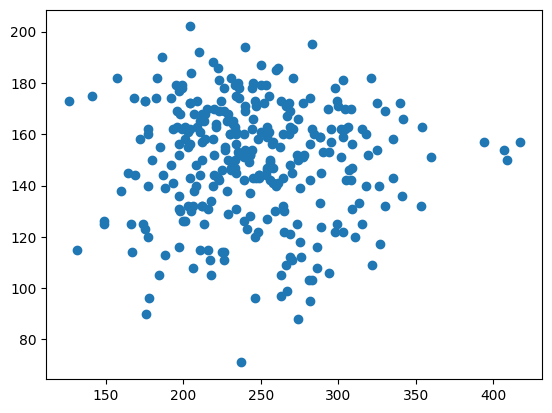

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['INCOME'],df['SPEND'])
plt.show()

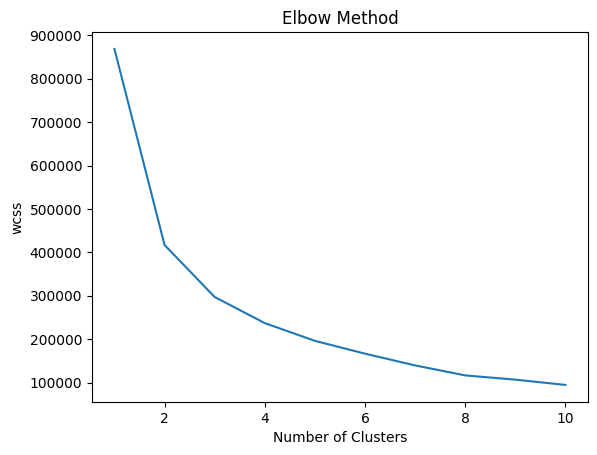

In [11]:
from sklearn.cluster import KMeans
X = df[['INCOME','SPEND']]
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [12]:
km = KMeans(n_clusters=4)
km.fit(X)
km.labels_

array([0, 0, 1, 0, 3, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 3, 2, 0, 1, 2,
       3, 3, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 3, 2, 2, 0, 2, 1,
       1, 0, 0, 1, 0, 2, 1, 0, 3, 0, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0,
       3, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 3, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 3, 1, 2, 3, 0, 3, 0, 0, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 3, 0, 0,
       2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 3, 2, 3, 2, 0,
       3, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 2, 3, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0,
       1, 1, 3, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 3, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 0, 2, 1,

In [15]:
df['labels']=km.labels_

In [16]:
df.head()

,INCOME,SPEND,LABELS,labels
0,233,150,0,0
1,250,187,0,0
2,204,172,0,1
3,236,178,0,0
4,354,163,1,3


In [17]:
df['labels'].value_counts()

labels
0    111
1     90
2     78
3     24
Name: count, dtype: int64

In [18]:
df.index[df['labels']==1].tolist()

[2,
 5,
 8,
 9,
 13,
 24,
 26,
 27,
 29,
 30,
 31,
 34,
 35,
 42,
 48,
 53,
 55,
 58,
 62,
 63,
 64,
 65,
 69,
 72,
 74,
 78,
 87,
 88,
 91,
 94,
 102,
 104,
 105,
 111,
 113,
 117,
 118,
 124,
 126,
 128,
 130,
 136,
 137,
 138,
 142,
 144,
 149,
 151,
 155,
 157,
 162,
 163,
 164,
 169,
 174,
 175,
 178,
 189,
 191,
 192,
 194,
 200,
 204,
 208,
 209,
 221,
 225,
 227,
 242,
 244,
 257,
 264,
 265,
 267,
 275,
 276,
 279,
 281,
 282,
 284,
 286,
 289,
 290,
 293,
 294,
 295,
 296,
 297,
 300,
 301]

In [21]:
data = [[120,30],[300,100],[160,14]]
x_test = pd.DataFrame(data,columns = ['INCOME','SPEND'])
print(x_test)

   INCOME  SPEND
0     120     30
1     300    100
2     160     14


In [23]:
km.predict(x_test)

array([1, 2, 1], dtype=int32)

In [24]:
y_pred = km.predict(X)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(df['labels'],y_pred)
print(cm)
s = accuracy_score(df['labels'],y_pred)
print(s*100)

[[111   0   0   0]
 [  0  90   0   0]
 [  0   0  78   0]
 [  0   0   0  24]]
100.0


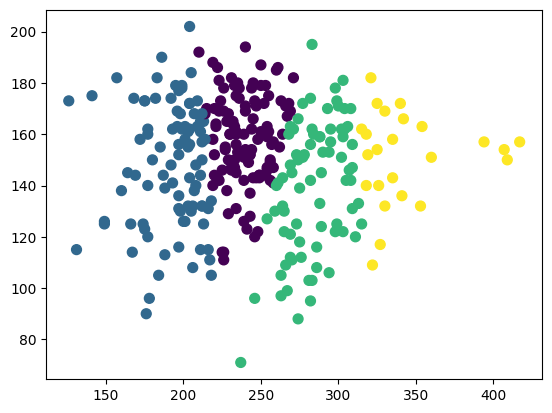

In [26]:
plt.scatter(df['INCOME'],df['SPEND'],c=df['labels'],s=50)

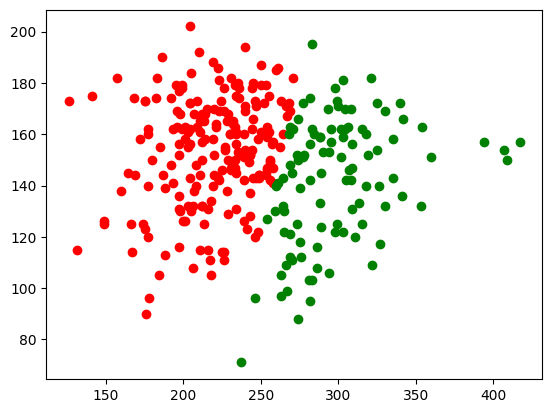

In [32]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(df)
labels = gmm.predict(df)
df['LABELS'] = labels
d0 = df[df['LABELS'] == 0]
d1 = df[df['LABELS'] == 1]
plt.scatter(d0["INCOME"],d0["SPEND"],c='r')
plt.scatter(d1["INCOME"],d1["SPEND"],c='g')
plt.show()